### Team members:

Erick Kramer


Mihir Patil


Swaroop Bhandary

# Radial basis function network (RBFN) homework.

In this homework you will implement from scratch your RBF-network using only numpy. This implementation will use gaussian kernel functions and the pseudo-inverse for linear regression.

## RBFN basic theory

Explain why is the pseudo-inverse used to linear regression in the RBFN network.

## RBFN implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [47]:
class RBFN(object):

    def __init__(self, hidden_dimension, sigma=1.0):
        """ Radial basis function network (RBFN)
        # Arguments
            hidden_dimension: Integer indicating number of
                radial basis functions
            sigma: Float indicating the precision of the Gaussian.
        """
        self.hidden_dimension = hidden_dimension
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def _kernel_function(self, center, data_point):
        """ Calculates the similarity/kernel function between
        the selected/constructed centers and the samples.
        # Arguments:
            center: numpy array of shape(, feature_dimension)
            data_points: numpy array of shape (, feature_dimension)
        # Returns:
            kernel_value: Float entry for the interpolation matrix.
        """
        
#         beta is the parameter to control the spread of the gaussian curve
        beta = 1/2*(self.sigma**2)
    
#         calculates the activation based on the beta and the euclidean distance between the selected center and datapoint
        similarity = np.exp(-beta * np.linalg.norm(data_point - center)**2)
        
        return similarity
        
        
    def _calculate_interpolation_matrix(self, X):
        """ Calculates interpolation matrix using a kernel_function
        # Arguments
            X: numpy array of features
                with shape (num_samples, feature_dimension)
        # Returns
            G: Numpy array of the interpolation matrix with
                shape (num_samples, hidden_dimensions)
        """

        G = np.zeros((len(X),self.hidden_dimension))
        
        for sample, si in enumerate(X):
            for center,ci  in enumerate(self.centers):
                G[sample,center] = self._kernel_function(center, sample)
                
        return G
            


    def _select_centers(self, X):
        """ Selects/creates centers from features.
        # Arguments:
            X: numpy array containing features of
                shape (num_samples, feature_dimension)
        # Returns:
            centers: numpy array containing feature centers
                of shape (hidden_dimension, feature_dimension)
        """
#         randomly select the number of centers from input data
        self.centers = np.random.choice(len(X),self.hidden_dimension)

    def fit(self, X, Y):
        """ Fits weights using linear regression
        # Arguments
            X: numpy array containing features of
                shape (num_samples, feature_dimension)
            Y: numpy array containing the targets
                of shape (num_samples, feature_dimension)
        """
        self._select_centers(X)
        
#         getting the similarity of every input w.r.t the selected centers
        G = self._calculate_interpolation_matrix(X)
        
#         setting the weights, using psuedo inverse to work with non-square matrix and for faster computation
        self.weights = np.dot(np.linalg.pinv(G),Y)
        

    def predict(self, X):
        """
        # Arguments
            X: numpy array of features
                of shape (num_samples, feature_dimension)
        # Returns:
            predictions: numpy array of shape (num_samples, )
        """
        G = self._calculate_interpolation_matrix(X)
        predicted = np.dot(G, self.weights)
        return predicted
    


Now apply your RBF-network implementation to two interpolation problems in 1D and 2D.

## RBFN 1D interpolation example

0


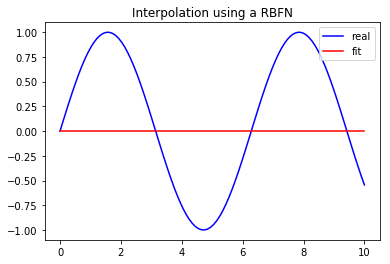

1


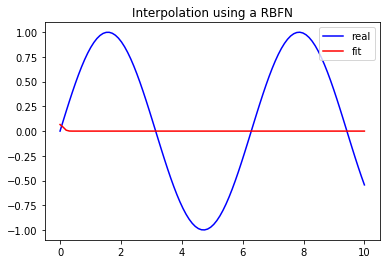

2


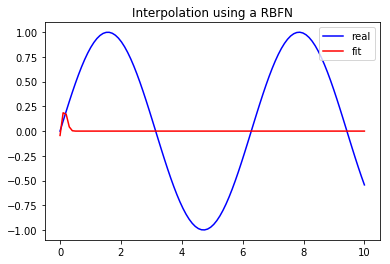

3


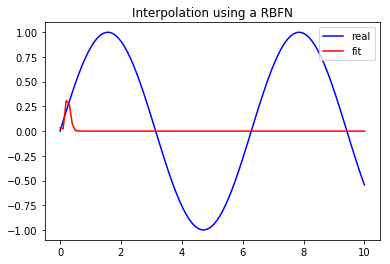

4


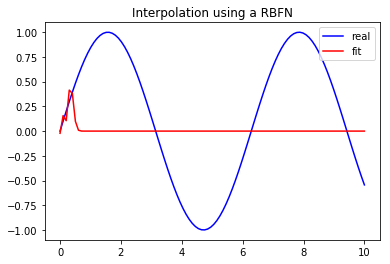

5


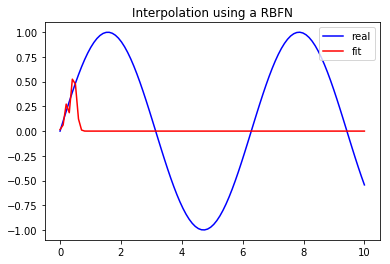

6


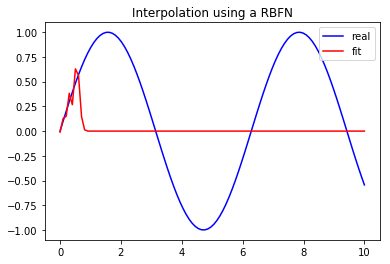

7


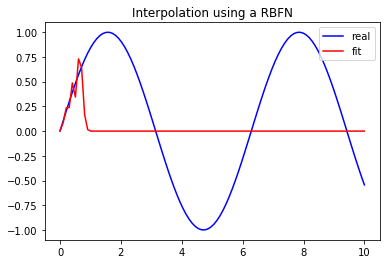

8


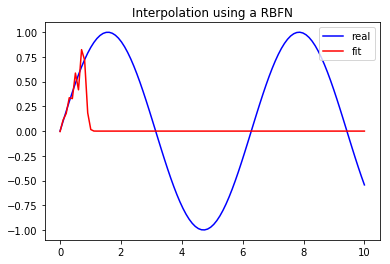

9


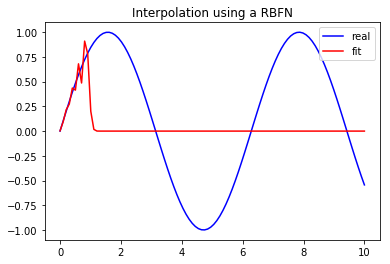

10


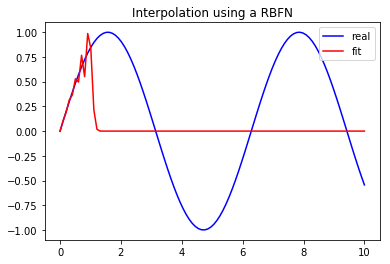

11


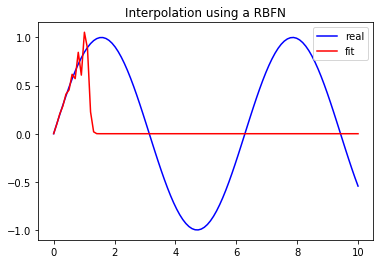

12


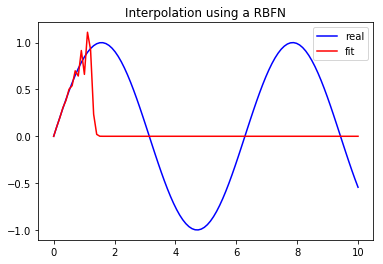

13


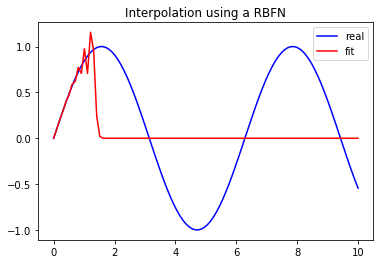

14


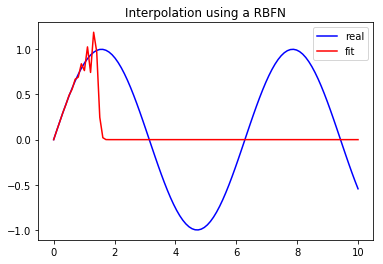

15


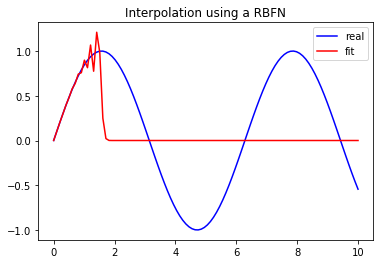

16


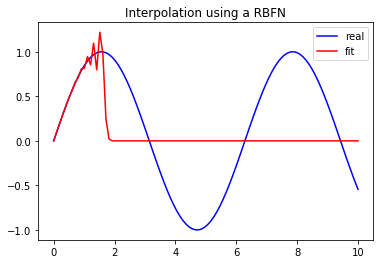

17


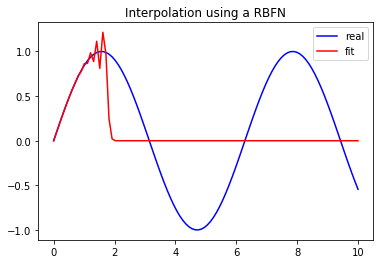

18


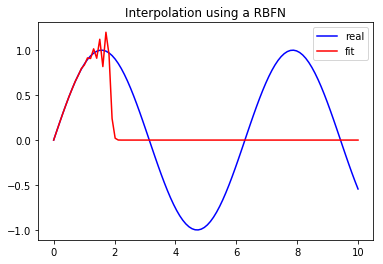

19


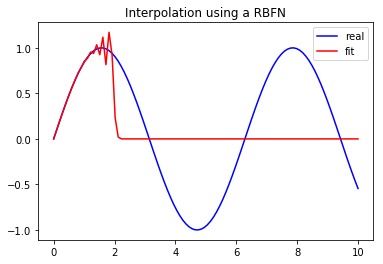

20


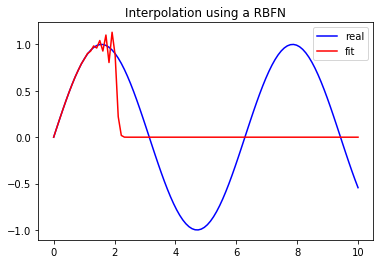

21


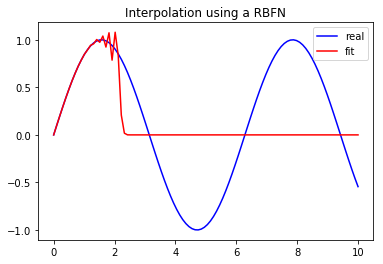

22


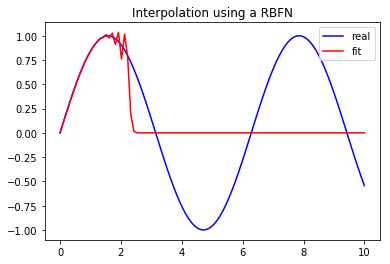

23


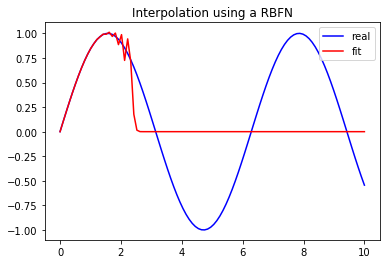

24


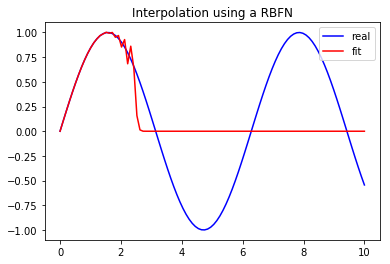

25


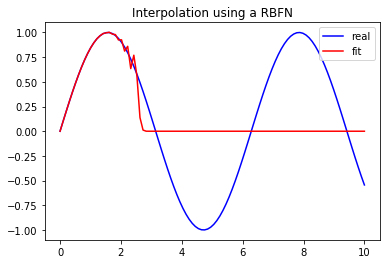

26


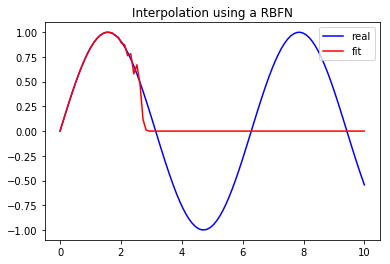

27


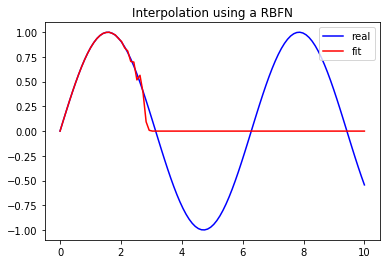

28


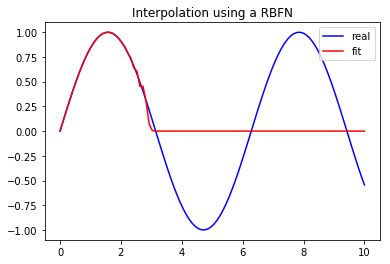

29


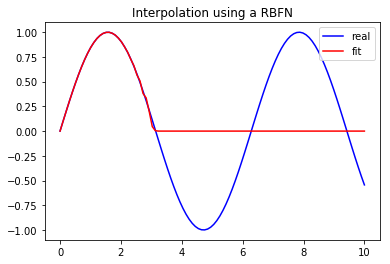

30


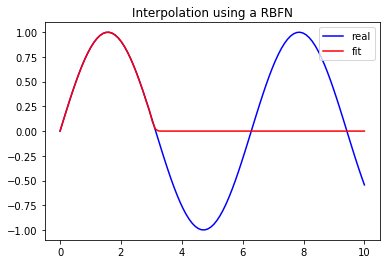

31


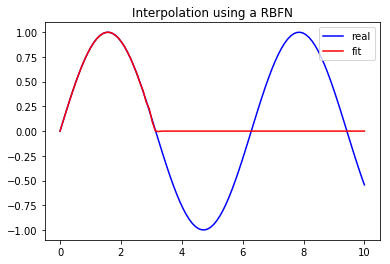

32


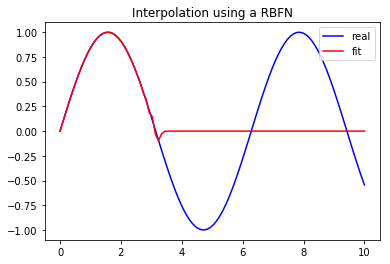

33


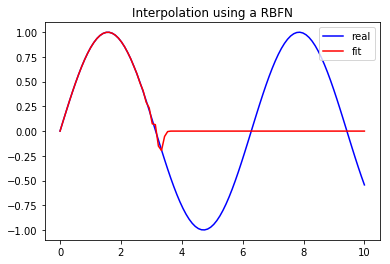

34


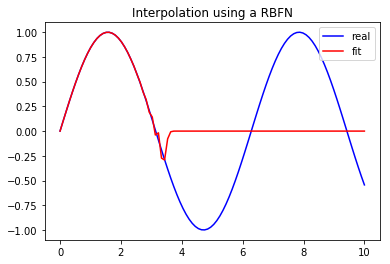

35


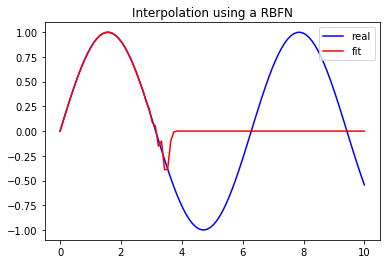

36


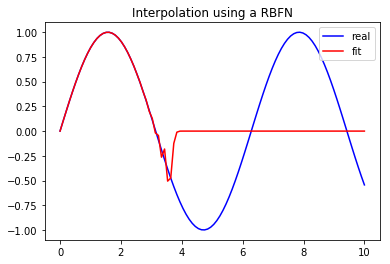

37


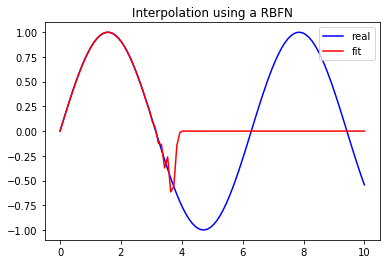

38


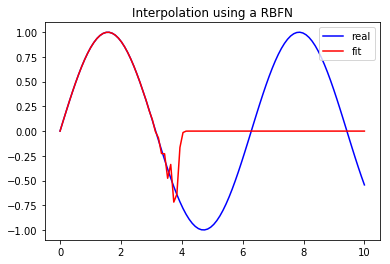

39


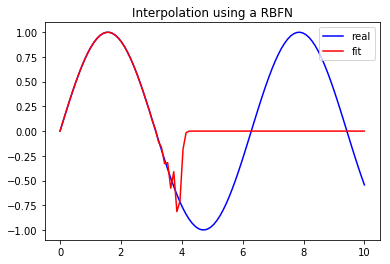

40


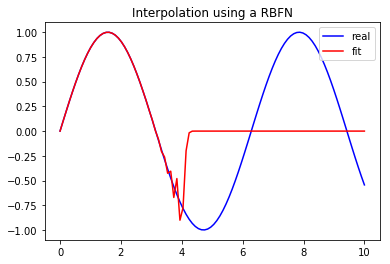

41


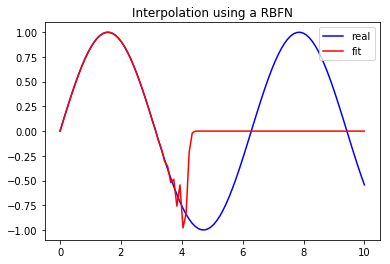

42


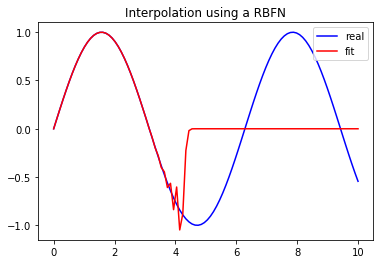

43


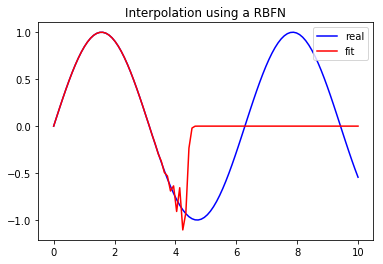

44


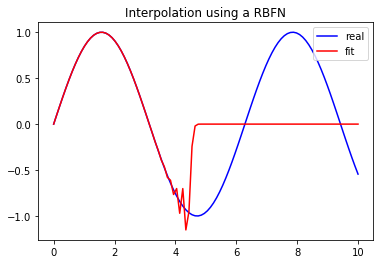

45


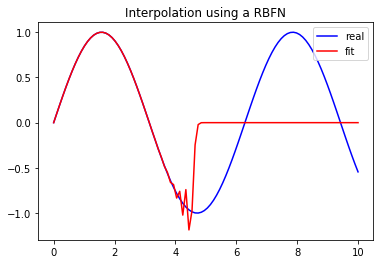

46


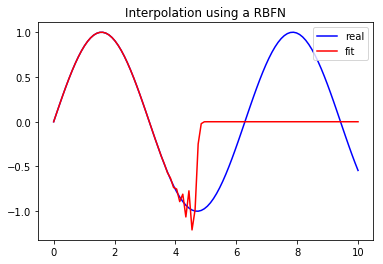

47


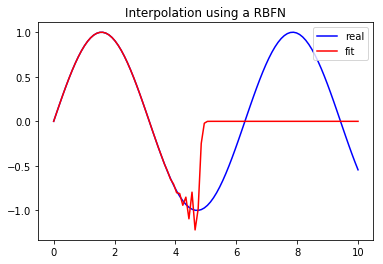

48


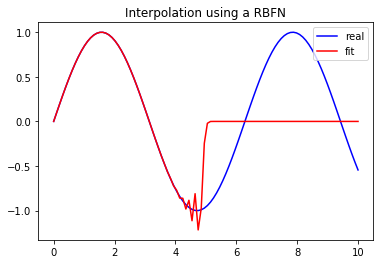

49


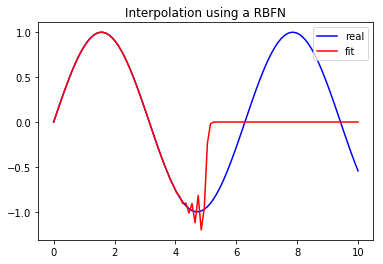

50


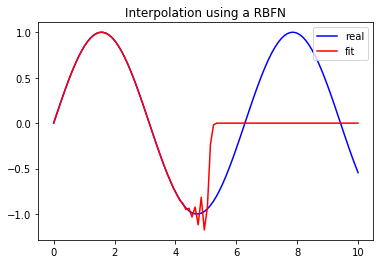

51


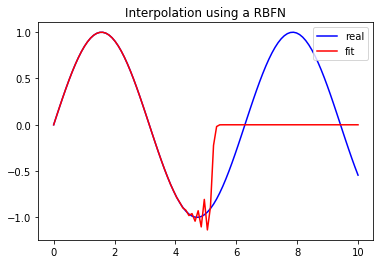

52


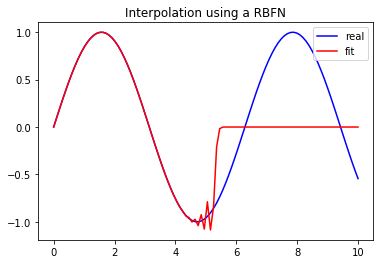

53


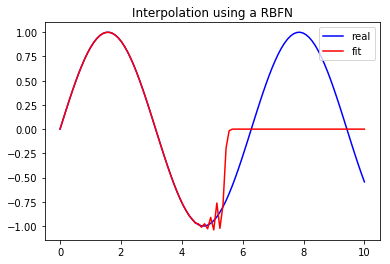

54


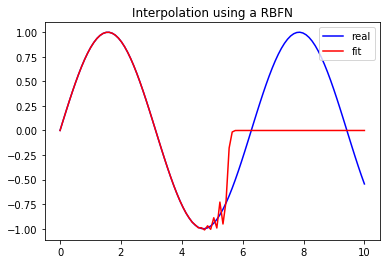

55


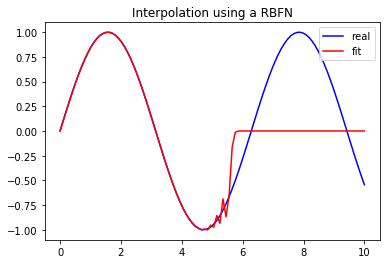

56


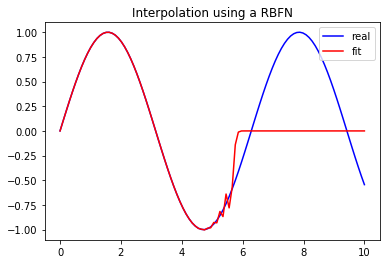

57


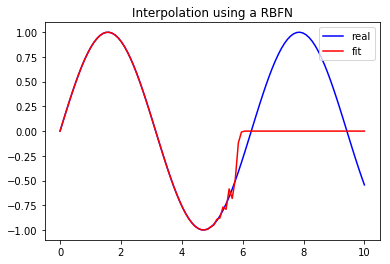

58


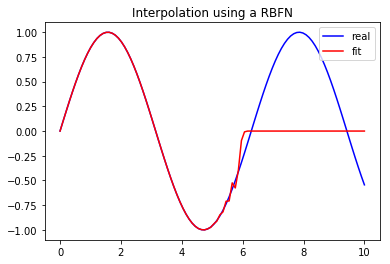

59


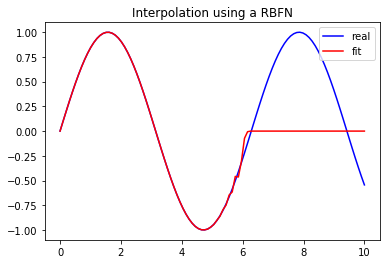

60


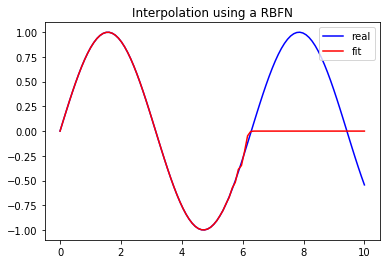

61


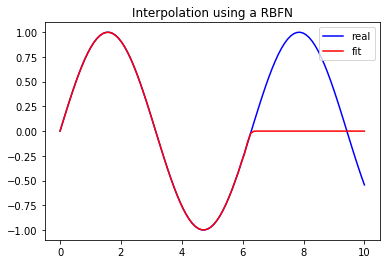

62


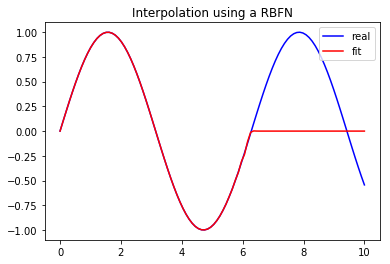

63


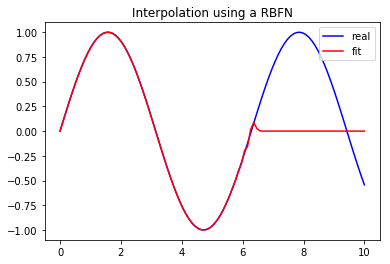

64


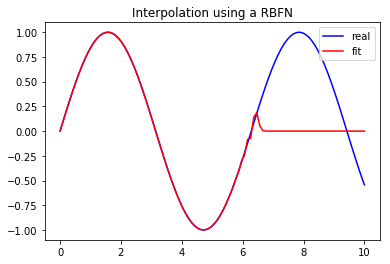

65


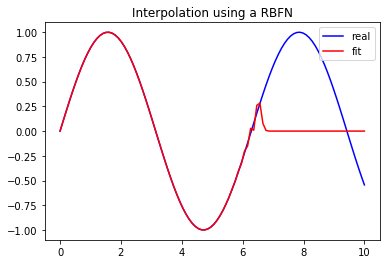

66


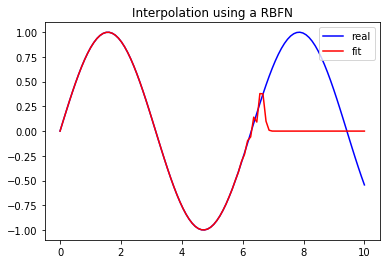

67


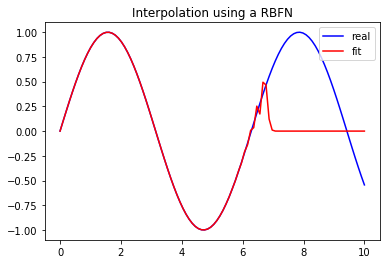

68


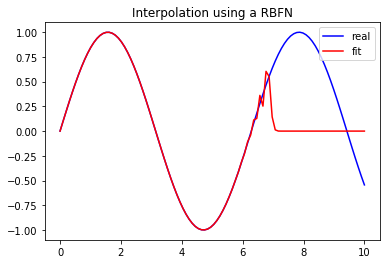

69


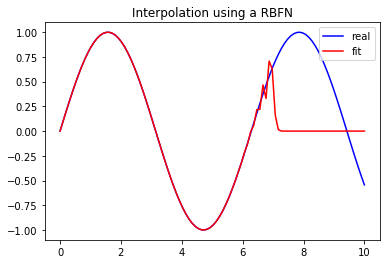

70


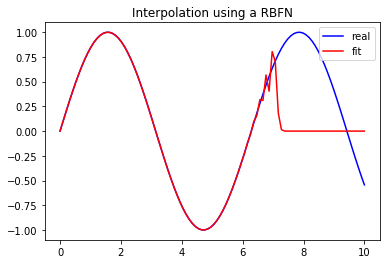

71


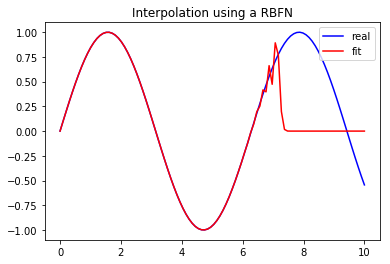

72


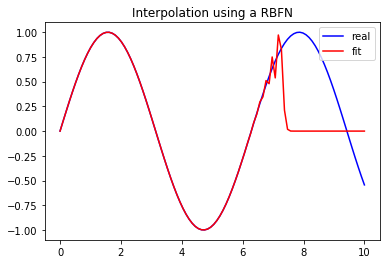

73


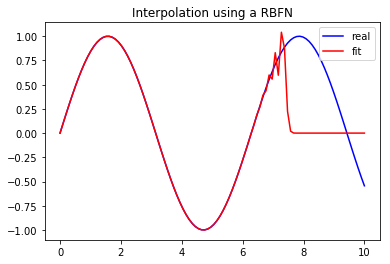

74


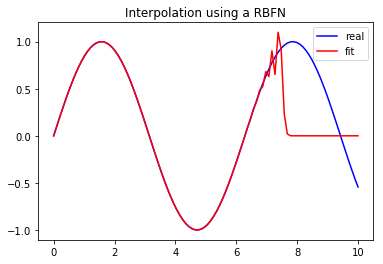

75


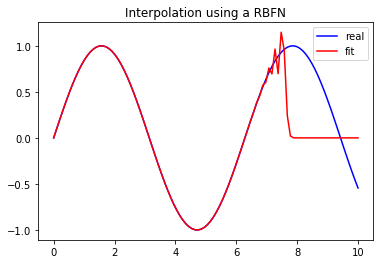

76


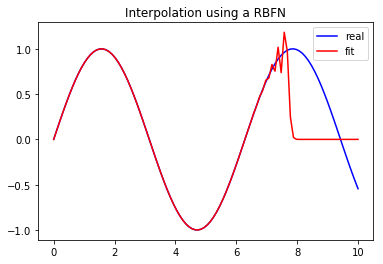

77


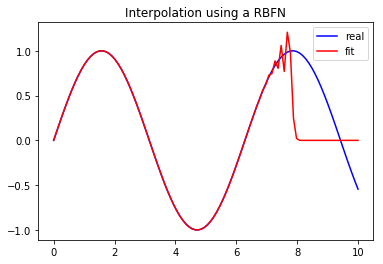

78


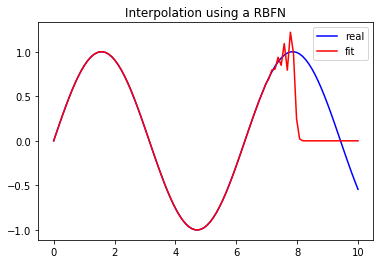

79


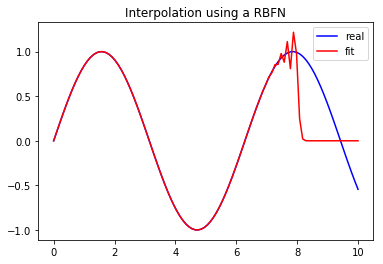

80


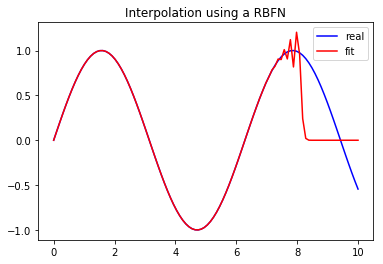

81


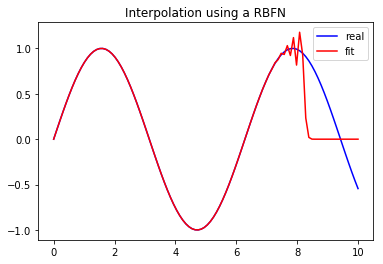

82


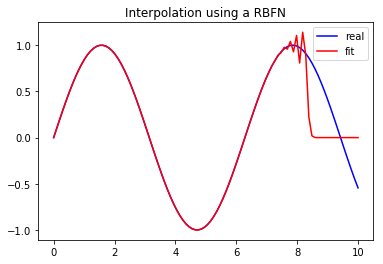

83


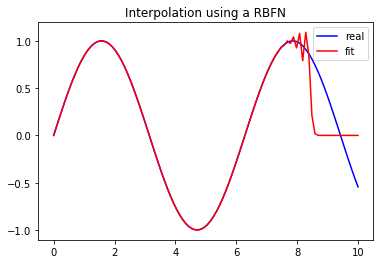

84


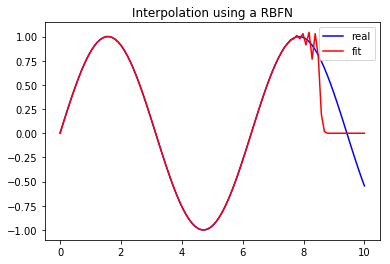

85


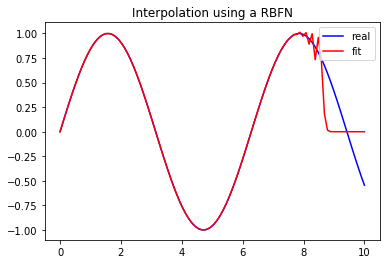

86


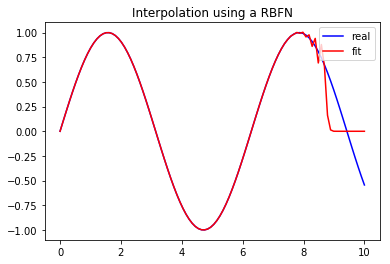

87


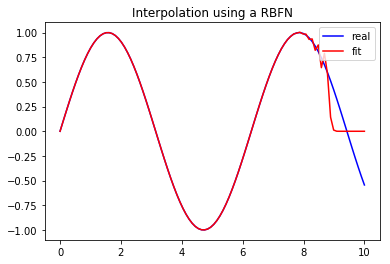

88


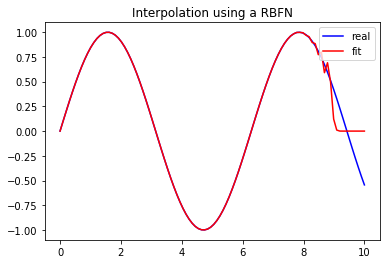

89


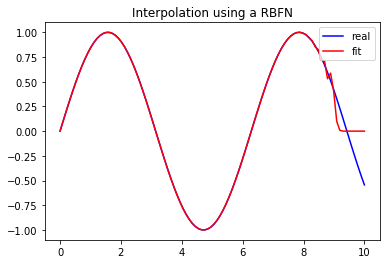

90


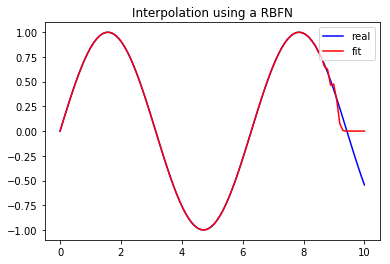

91


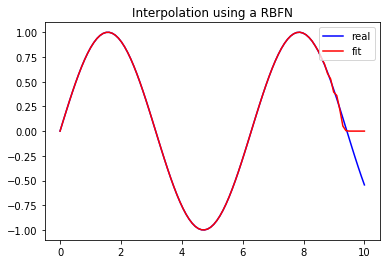

92


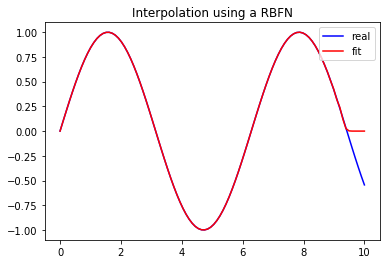

93


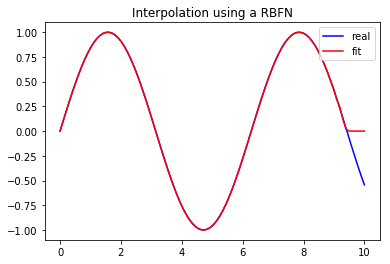

94


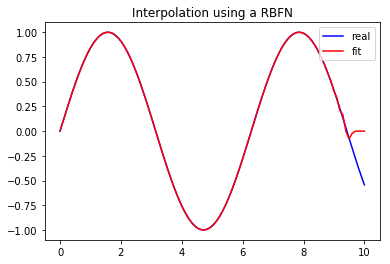

95


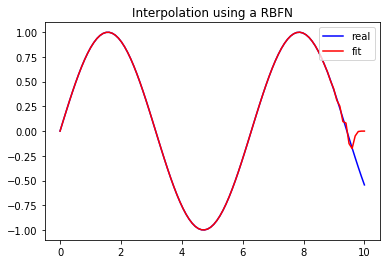

96


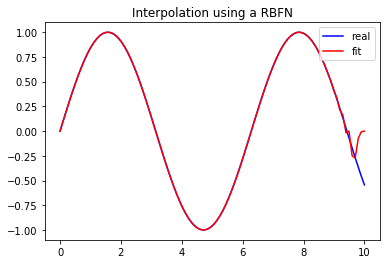

97


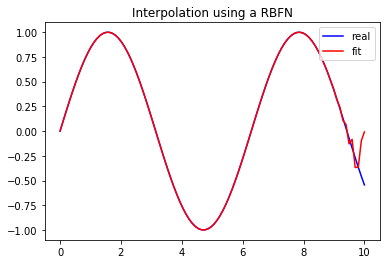

98


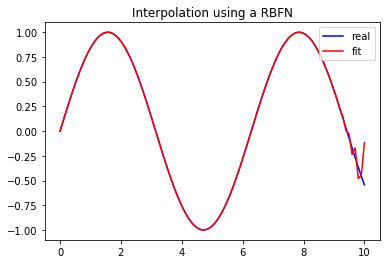

99


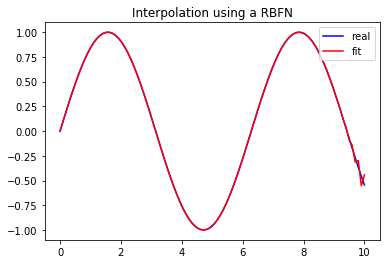

In [48]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

for i in range(100):
    model = RBFN(hidden_dimension=i, sigma=1)
    model._kernel_function
    model.fit(x, y)
    y_pred= model.predict(x)
    
    print(i)
    plt.plot(x, y, 'b-', label='real')
    plt.plot(x, y_pred, 'r-', label='fit')
    plt.legend(loc='upper right')
    plt.title('Interpolation using a RBFN')
    plt.show()

Measure the error of the interpolation using mean squared error as you increase the hidden shape and as you vary the sigma

## RBFN 2D interpolation example

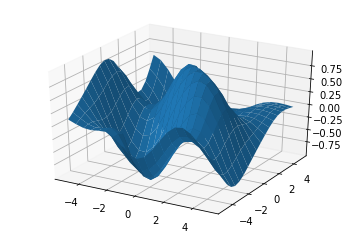

In [49]:
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
x, y = np.meshgrid(x, y)
z1 = np.sin(np.sqrt((x - 2.)**2 + (y - 1)**2))
z2 = np.sin(np.sqrt((x + 2.)**2 + (y + 4)**2))
z = (z1 - z2) / 2.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
plt.show()

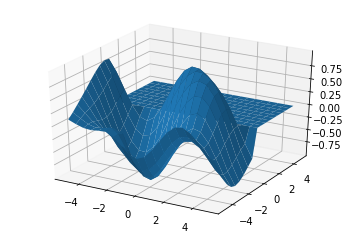

In [50]:
features = np.asarray(list(zip(x.flatten().tolist(), y.flatten().tolist())))
targets = z.flatten()

#have to vary the values for hidden_dimension and sigma
model = RBFN(hidden_dimension=200, sigma=20)
model.fit(features, targets)
predictions = model.predict(features)
figure = plt.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, predictions.reshape(20, 20))
plt.show()

Measure the error of the interpolation using mean squared error as you increase the hidden shape and as you vary the sigma